In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Reset indeks dan tambahkan 1 untuk membuat indeks dimulai dari 1
df = df.reset_index(drop=True)
df.index = df.index + 1

# Tampilkan beberapa baris pertama DataFrame untuk memastikan data berhasil dimuat
display(df.head())

Saving student_depression_dataset.xlsx to student_depression_dataset.xlsx


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
2,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours',Moderate,BSc,No,3,2,Yes,0
3,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours',Healthy,BA,No,9,1,Yes,0
4,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
5,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [2]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung statistik deskriptif, median, modus, simpangan rata-rata, range, dan variansi
descriptive_stats = numerical_df.describe()
median_values = numerical_df.median()
mode_values = numerical_df.mode().iloc[0]
mad_values = numerical_df.apply(lambda x: (x - x.mean()).abs().mean())
range_values = numerical_df.max() - numerical_df.min()
variance_values = numerical_df.var()


descriptive_stats.loc['median'] = median_values
descriptive_stats.loc['mode'] = mode_values
descriptive_stats.loc['mAD'] = mad_values
descriptive_stats.loc['range'] = range_values
descriptive_stats.loc['variance'] = variance_values


print("Ringkasan Statistik Deskriptif:")
display(descriptive_stats)

Ringkasan Statistik Deskriptif:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,2.790100e+04,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,7.044215e+04,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.064118e+04,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000e+00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.503900e+04,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,7.068400e+04,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,1.058180e+05,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,1.406990e+05,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000
median,7.068400e+04,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
mode,2.000000e+00,24.000000,3.000000,0.000000,8.040000,4.000000,0.000000,10.000000,1.000000


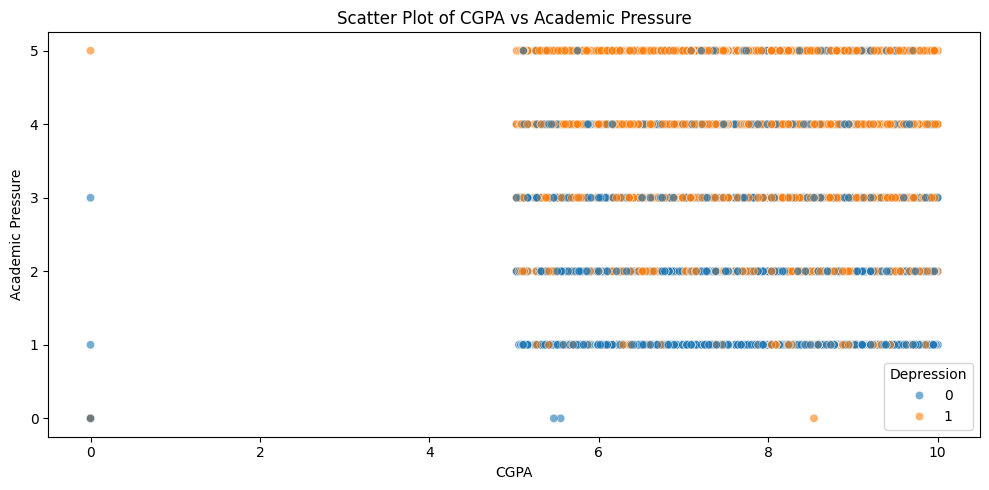

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh visualisasi hubungan antar dua kolom numerik (Scatter Plot)
# Kita bisa memilih kolom yang relevan, misalnya CGPA vs Academic Pressure, diwarnai berdasarkan 'Depression'
numerical_cols_scatter = ['CGPA', 'Academic Pressure']
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x=numerical_cols_scatter[0], y=numerical_cols_scatter[1], hue='Depression', alpha=0.6)
plt.title(f'Scatter Plot of {numerical_cols_scatter[0]} vs {numerical_cols_scatter[1]}')
plt.xlabel(numerical_cols_scatter[0])
plt.ylabel(numerical_cols_scatter[1])
plt.tight_layout()
plt.show()

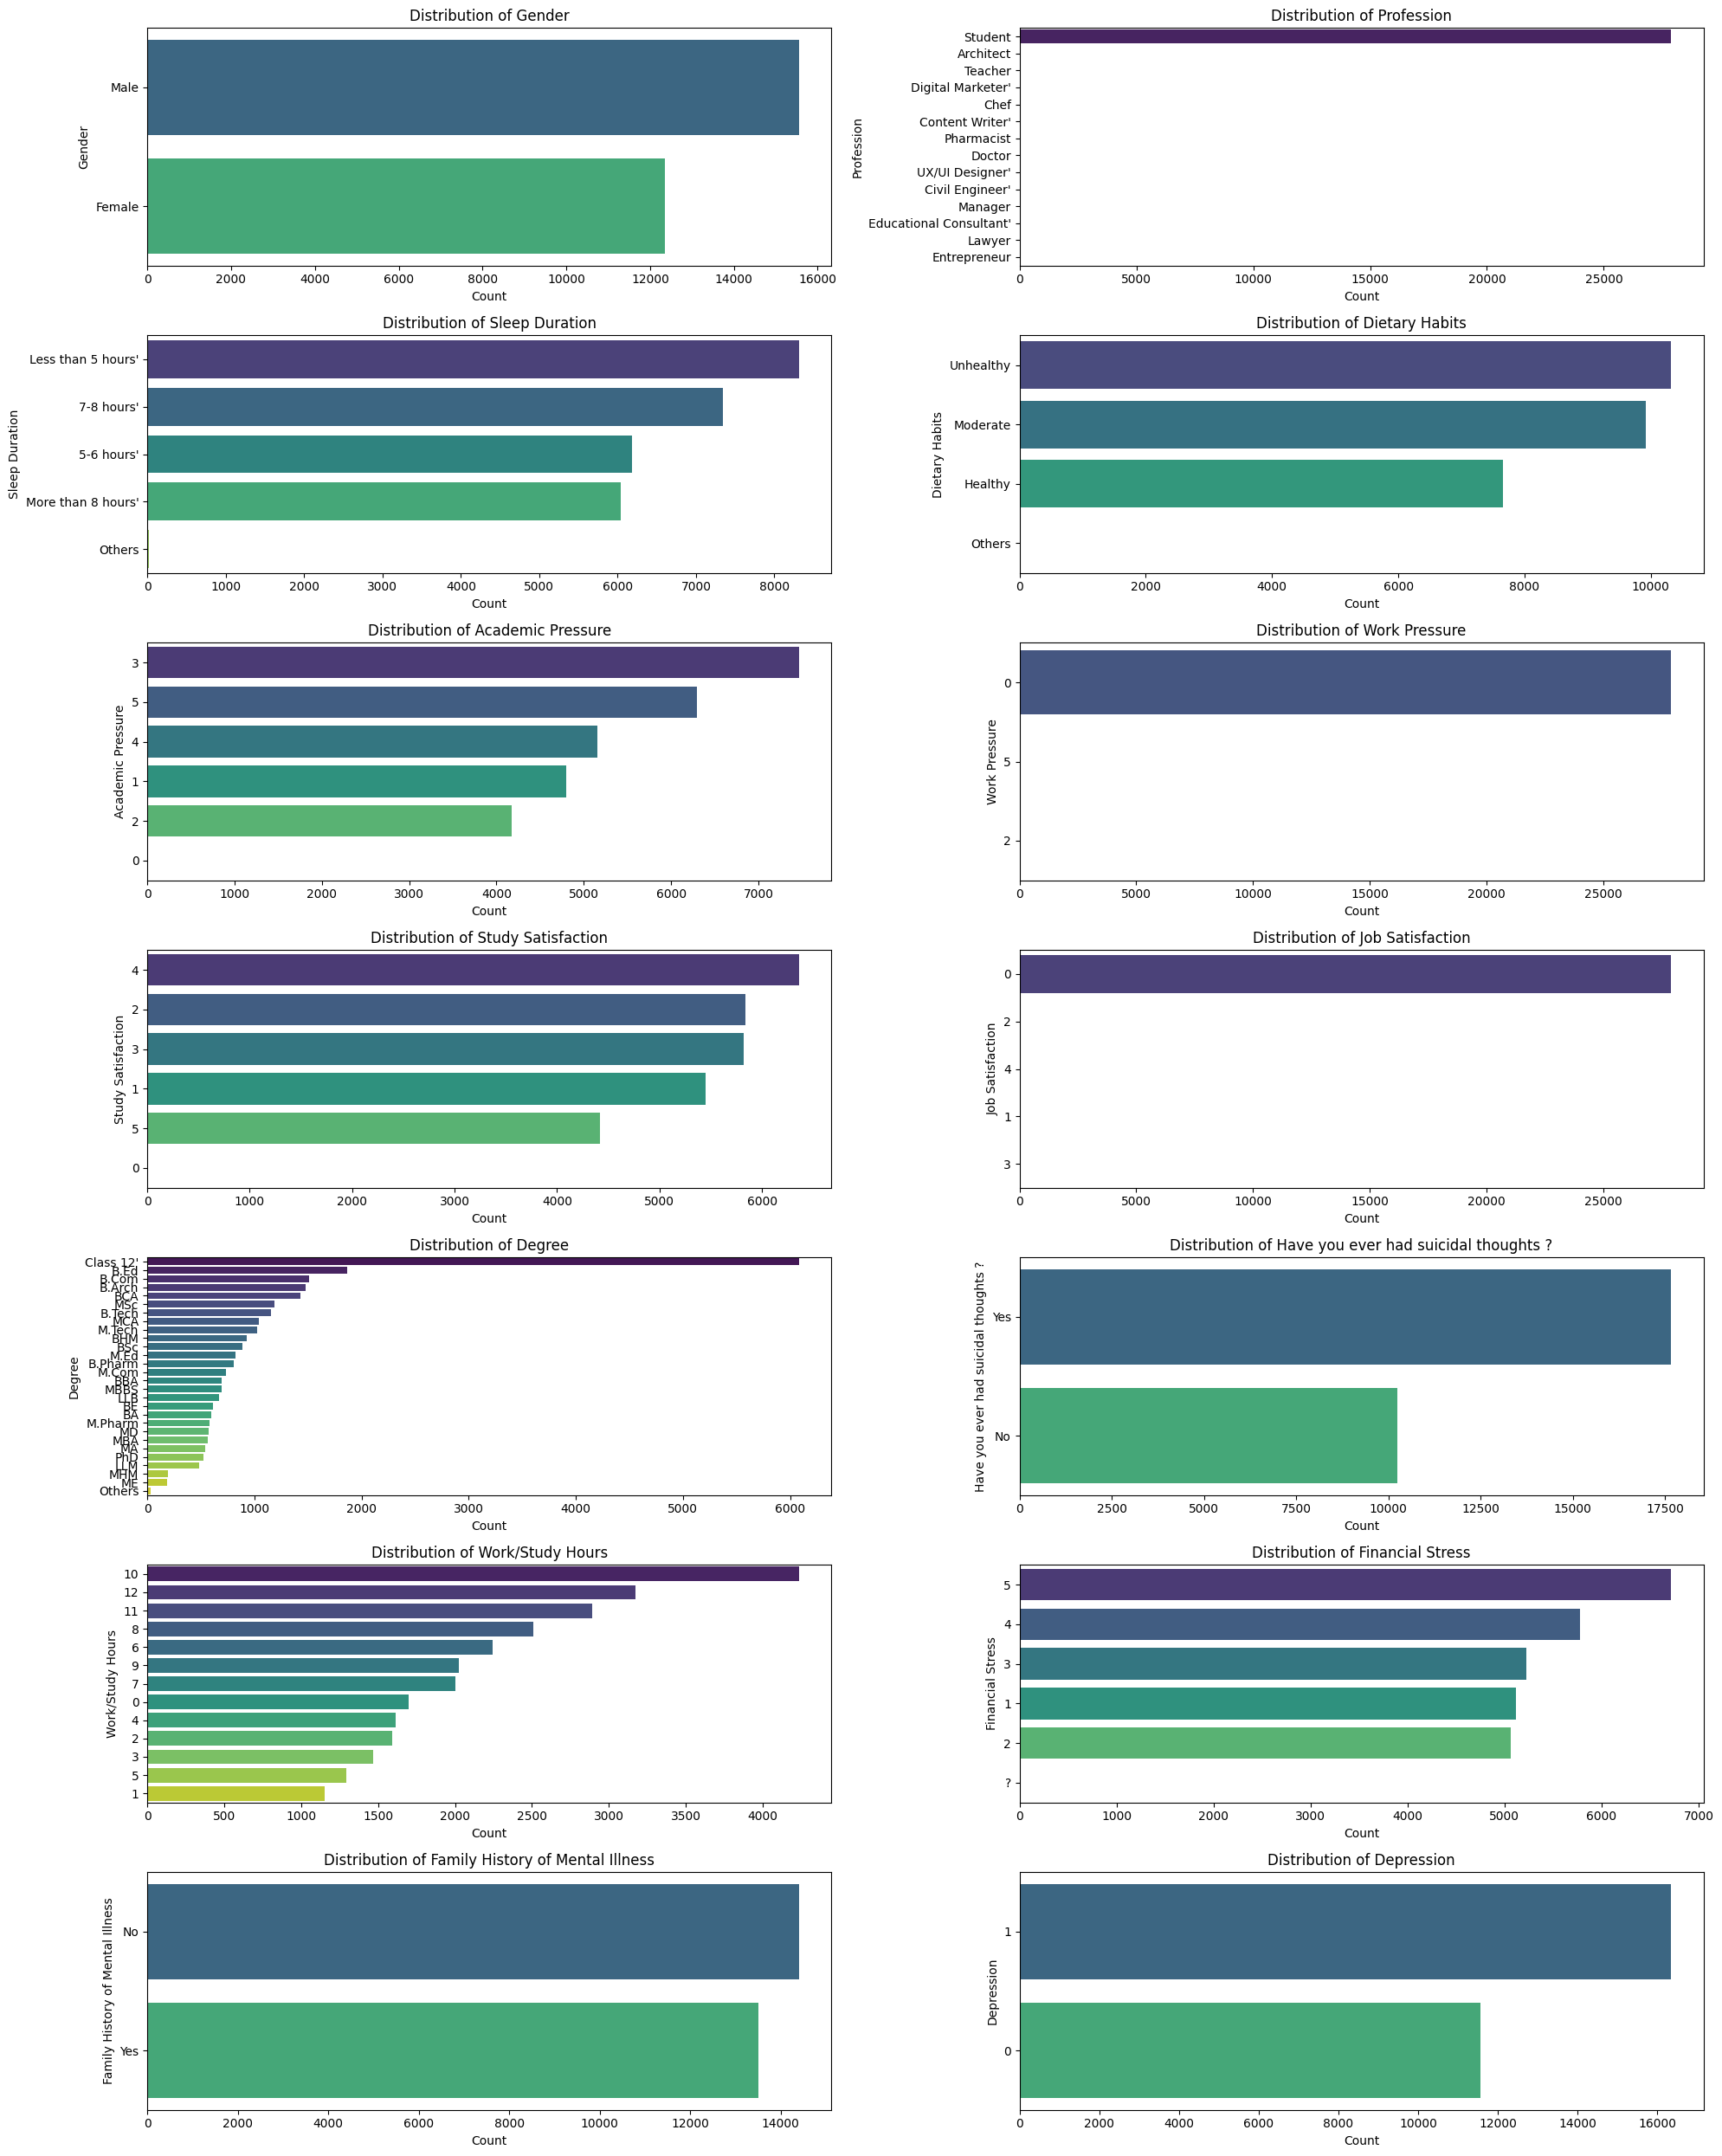

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Visualisasi untuk kolom kategorikal (Count Plot)
categorical_cols_count = [
    'Gender',
    'Profession',
    'Sleep Duration',
    'Dietary Habits',
    'Academic Pressure',
    'Work Pressure',
    'Study Satisfaction',
    'Job Satisfaction',
    'Degree',
    'Have you ever had suicidal thoughts ?',
    'Work/Study Hours',
    'Financial Stress',
    'Family History of Mental Illness',
    'Depression'
]

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols_count):
    plt.subplot(7, 2, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()